In [4]:
# mittlere Dichte der Erde

import math

R = 6373e3
m = 5.972e24

V = 4 / 3 * math.pi * R**3
rho = m / V
print(f"mittlere Dichte der Erde {rho/1e3:.3f} g/cm3")

mittlere Dichte der Erde 5.508 g/cm3


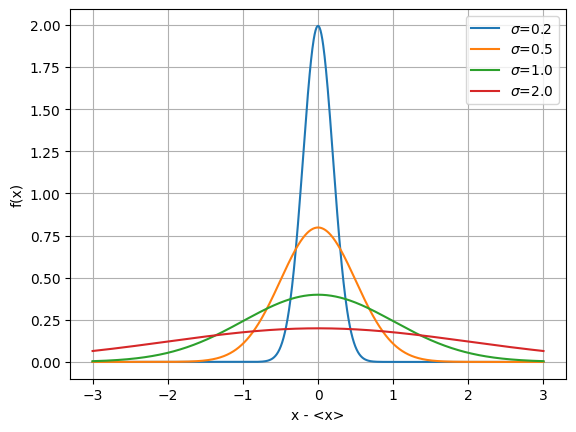

In [30]:
# gauss_plot

import numpy as np
import matplotlib.pyplot as plt

def f(x, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x ** 2 / (2 * sigma**2))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x - <x>')
ax.set_ylabel('f(x)')
ax.grid()

x = np.linspace(-3,3,1000)
#ax.plot(x,f(x,0.1), label=f'$\\sigma$={sigma}')
for sigma in [0.2, 0.5, 1.0, 2.0]:
    ax.plot(x,f(x,sigma), label=f'$\\sigma$={sigma}')

ax.legend()
plt.show()

In [24]:
# guass_integral

import math
import numpy as np
import scipy.integrate

sigma = 0.5
x_max = 3

def f(x, sigma=0.5):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x ** 2 / (2 * sigma**2))

def f_math(x):
    a = 1 / (math.sqrt(2 * math.pi) * sigma)
    return a * math.exp(- x**2 / (2 * sigma**2))

def fx(x):
    # a = 1 / (np.sqrt(2 * np.pi) * sigma)
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- x**2 / (2 * sigma**2))

p, err = scipy.integrate.quad(f, -x_max, x_max)
print(f"integral={p}\nerror={err}")

p, err = scipy.integrate.quad(f, -np.inf, np.inf)
print(f"integral={p}\nerror={err}")


integral=0.9999999980268247
error=1.1229898923267e-14
integral=1.000000000000001
error=3.564509628865872e-09


In [14]:
# Program 3.6 standardabweichung

import numpy as np

T = np.array([2.05, 1.99, 2.06, 1.97, 2.01, 2.00, 2.03, 1.97, 2.02, 1.96])
mittel = np.mean(T)
sigma = np.std(T, ddof=1)
delta_T = sigma / np.sqrt(T.size)

print(f"\u00d8 = {mittel:.2f}\n\u03c3 = {sigma:.2f}\nmittlerer Fehler={delta_T:.2f}")

Ø = 2.01
σ = 0.03
mittlerer Fehler=0.01


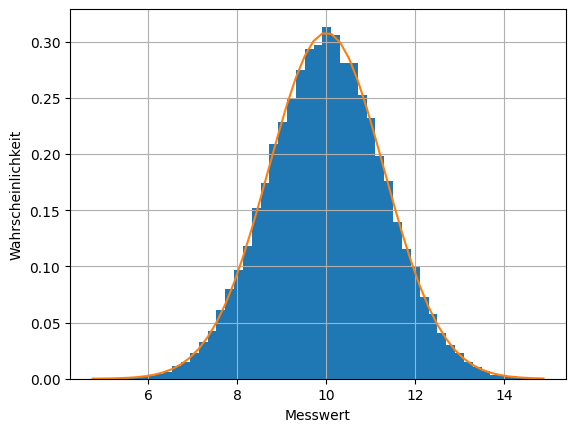

In [46]:
# gauss simulation

import numpy as np
import matplotlib.pyplot as plt

n_mess = 50000
n_stoer = 20

mess = np.random.rand(n_mess, n_stoer)
mess = np.sum(mess, axis=1)
mittel = np.mean(mess)
sigma = np.std(mess, ddof=1)

def f(x):
    return ( 1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- (x - mittel)**2 / (2 * sigma**2))


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Messwert")
ax.set_ylabel("Wahrscheinlichkeit")
ax.grid()

p, bins, patches = ax.hist(mess, bins=51, density=True)
ax.plot(bins, f(bins))
plt.show()

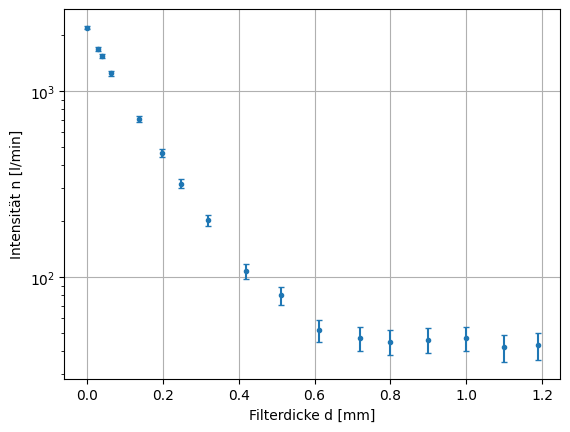

In [10]:
# messdaten_radioaktivitaet

import numpy as np
import matplotlib.pyplot as plt

# Filterdicke
d = np.array([0.000, 0.029, 0.039, 0.064, 0.136, 0.198, 0.247, 0.319, 0.419, 0.511, 0.611, 0.719, 0.800, 0.900, 1.000, 1.100, 1.189],dtype=float)
# Messwerte
n = np.array([2193, 1691, 1544, 1244, 706, 466, 318, 202, 108, 80, 52, 47, 45, 46, 47, 42, 43], dtype=float)
# Fehler der Messsung
dn = np.array([47, 41, 39, 35, 26, 22, 18, 14, 10, 9, 7, 7, 7, 7, 7, 7, 7], dtype=float)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Filterdicke d [mm]')
ax.set_ylabel('Intensität n [l/min]')
ax.set_yscale('log')
ax.grid()

ax.errorbar(d, n, yerr=dn, fmt='.', capsize=2)
plt.show()

n_u  =   49 +-  6 l/min.
n_0  = 2116 +- 13 l/min.
alpha=    9 +-  0 l/min.


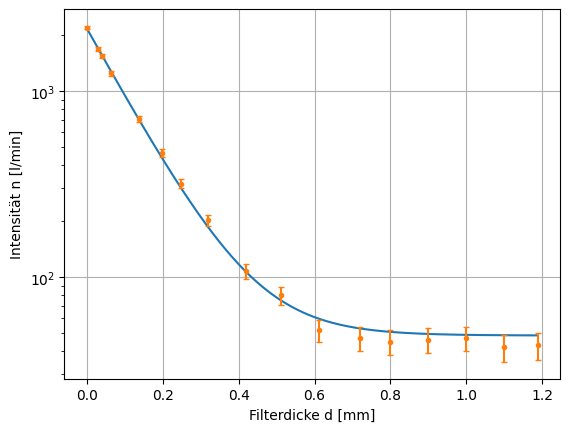

In [11]:
# messdaten_radioaktivitaet_fit1

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# Funktion die gefiltert (= optimiert) werden soll
# d ist die unabhängige Variable die anderen sind die Parameter der Gleichung die der Optimierung zugrunde liegt
# Also (3.8)
def func(d, n_u, n_0, alpha):
    return n_u + n_0 * np.exp(-alpha * d)       # (3.8)

popt, pcov = scipy.optimize.curve_fit(func, d, n, [40, 2200, 10])
n_u, n_0, alpha = popt
d_n_u, d_n_0, d_alpha = np.sqrt(np.diag(pcov))

print(f"n_u  = {n_u:4.0f} +- {d_n_u:2.0f} l/min.")
print(f"n_0  = {n_0:4.0f} +- {d_n_0:2.0f} l/min.")
print(f"alpha= {alpha:4.0f} +- {d_alpha:2.0f} l/min.")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Filterdicke d [mm]')
ax.set_ylabel('Intensität n [l/min]')
ax.set_yscale('log')
ax.grid()

d_fit = np.linspace(np.min(d), np.max(d), 500)
n_fit = func(d_fit, n_u, n_0, alpha)
ax.plot(d_fit, n_fit, '-', zorder=2)

ax.errorbar(d, n, yerr=dn, fmt='.', capsize=2, zorder=3)
plt.show()